# Chapter 0202. Linear Regression

Ta có cái nhìn tổng quát về các thuật toán học có giám sát trong phần trước, nhắc lại: một thuật toán được xếp loại là thuật toán supervised learning khi và chỉ khi dữ liệu đầu vào đã được gán nhán; một thuật toán classification là thuật toán từ dữ liệu đầu vào đã được gán nhãn xây dựng mô hình phân lớp để dự đoán input đầu vào thuộc vào class nào; còn thuật toán được gọi là Regression khi và chỉ khi từ tập dữ liệu đầu vào đã được gán nhãn ta đi xây dựng một mô hình dự đoán xem giá trị ouput đầu ra ứng một điểm dữ liệu đầu vào bất kì là bao nhiêu.

![Types of Machine  Learning](https://miro.medium.com/max/602/0*-068ud_-o3ajwq_z.jpg)

![Types of Supervised Learning](https://miro.medium.com/max/429/1*HKJTVHXyTBsR-3ljuBL6qQ.png)

Trong phần 02 này, chúng ta tìm hiểu một thuật toán rất là cơ bản và cũng đầy ý nghĩ đối với việc học Machine Learning. Đó là thuật toán Linear Regression(Hồi quy tuyến tính) bên cạnh đó còn mở rộng phạm ra hồi quy phi tuyến.

## Nội dung:
### 1. **Các bài toán "*tiên đoán*".**
    Bài toán dự đoán dân số thế giới.
    Bài toán dự đoán cân nặng.
    Bài toán dự đoán giá nhà.
    Bài toán tính sinh số ngẫu nhiên
### 2. **Mô hình toán học của hồi quy tuyến tính.**
    Mô hình hóa bài toán
    Các chuẩn khoảng cách
    Phương pháp bình phương nhỏ nhất (Least Square Method)
    Nghiệm của hồi quy tuyến tính
### 3. **Lời giải cho hai bài toán "*tiên đoán*" đầu tiên.**
    Nhắc lại flow của việc build một model machine learning
    Giải quyết bài toán dân số
    Giải quyết bài toán dự đoán cân nặng
### 4. **Hồi quy tuyến tính nhiều biến.**
    Định nghĩa hàm tuyến tính nhiều biến và biểu diễn hình học trong không gian
    Mô hình hóa bài toán dự đoán giá nhà
    Giải quyết bài toán
### 5. **Hồi quy đa thức.**
    Traight line không fit với dataset !!!
    Overfiting
### 6. **Đánh giá một mô hình hồi quy tuyến tính.**
    Các bài toán giải được bằng linear regression
    Hạn chế của linear regression
    Ridge regression
    Phương pháp tối ưu khác: Gradient Decent
### 7. **Tóm tắt.**

![Let's go](http://www.letsgo-saipan.com/wp-content/uploads/2018/03/letsgo-saipan-finale-logo.png)

## 1. Các bài toán "*tiên đoán*"

Nếu như các bạn có chú ý đến cái được gọi là `tiên tri` thì chắc hẵn biết đến các nhà tiên tri hàng đầu trên thế giới nhỉ, ví dụ như [Nostradamus](https://khoahoc.tv/diem-lai-nhung-loi-tien-tri-dung-den-kinh-hai-cua-nha-tien-tri-nostradamus-63165) (1503-1566), là một dược sĩ và nhà tiên tri người Pháp; [Baba Vanga](https://vi.wikipedia.org/wiki/Baba_Vanga)(31/01/1911 – 11/08/1996), với các pha tiên tri chính xác thần thánh, [bạch tuột Paul](https://vi.wikipedia.org/wiki/B%E1%BA%A1ch_tu%E1%BB%99c_Paul) dự đoán trong các kì World cup, Euro, ... Chính bản thân bạn cũng là một nhà tiên tri. Ví dụ như bạn có thể biết được rằng bạn sẽ rớt môn khi bạn không đến lớp một ngày nào cả. :)

![Baba Vanga](https://upload.wikimedia.org/wikipedia/commons/0/0d/Vanga.jpg)

![Nostradamus](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c6/Nostradamus_by_Cesar.jpg/390px-Nostradamus_by_Cesar.jpg)

![Bạch tuột Paul](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/Oktopus-Orakel_Paul_mit_Schuh.JPG/640px-Oktopus-Orakel_Paul_mit_Schuh.JPG)

**Làm thế nào có thể dự đoán được mọi chuyện sắp xảy ra trong tương lai gần cũng như tương lai xa ?**

Đó là những vấn đề nhạy cảm vì có liên quan đến nhiều khía cạnh, có thể là có khả năng siêu nhiên, hay những nhà tiên tri của chúng ta có nhãn quan khác thường. Tuy nhiên, trong thực tế ngày nay thì những việc tiên tri hay đưa ra giả thuyết phi khoa học như vậy có lẽ không được quan tâm nhiều lắm, thay vào đó là việc tìm ra quy luật, tính chất có liên quan đến xã hội. Thay vì cố dùng siêu năng lực của mình để đoán xem khi nào tận thế, thì hãy nghiên cứu về việc dân số thế giới sẽ là bao nhiêu trong vài năm nữa, cơ sở vật chất, tốc độ phát triển sẽ như thế nào.

Trong machine learning, việc áp dụng toán để cho ra những điều `'tiên tri'` là có thể, và điều tiên tri này gắn liền với một mục đích xác thực, có ý nghĩa cho người xây dụng mô hình và xã hội. Hãy xem các bài toán ví dụ dưới đây.

![Proplems](http://info.ringfeder.com/hubfs/Blog_Pictures/2017/2017_2/abstraktes-denken-soft-skill-ingenieure.png)

### *Bài toán dự đoán dân số thế giới*

Đây là một bài toán hết sức đơn giản nhưng có nhiều ý nghĩa. **Bài toán được phát biểu như sau: Cho bảng số liệu Thống kê 
dân số thế giới trong các năm trước đây(1950-2005), hỏi rằng tự bộ số liệu này bạn có thể dự đoán được dân số thế giới trong năm 2010, 2015, 2020 hay không ? Và nếu dự đoán được thì tỉ lệ chính xác của bạn là bao nhiêu hỡi nhà tiên tri ?**

![Population of World](https://scontent.fsgn5-7.fna.fbcdn.net/v/t1.15752-9/71479248_385678205410755_1393467435851448320_n.png?_nc_cat=101&_nc_oc=AQnFr_3_CbJd2tjz6Te3Wy6oaRUZph4p-C3ieYAHVXL8QBVT_T8cK4wp6Ikzigl_WyQ&_nc_ht=scontent.fsgn5-7.fna&oh=244110fcf0ab4f74190ef9a14cbcb6d9&oe=5DFBE927)

Một bài toán mang tầm thới thế nhỉ, đây là một bảng số liệu trong quyển sách rất nổi tiếng của tác giả Michael Baron.

### *Bài toán dự đoán cân nặng*

Bài toán này được xây dựng nhờ vào việc quan sát, được phát biểu như sau: **Với một bộ số liệu về chiều cao-cân nặng cho trước, hãy dự đoán xem một người với chiều cao là $X(m)$ bất kì có cân nặng là bao nhiều kg ?** Bài toán này khá là đơn giản nhỉ, nhưng cũng mang tính y học khá cao vì thấy được tính chất chiều cao và cân nặng có quan hệ như nào với nhau đối với người bình thường.

![Chiều cao-Cân nặng](https://scontent.fsgn5-6.fna.fbcdn.net/v/t1.15752-9/70351549_409554859764076_14264810455695360_n.png?_nc_cat=109&_nc_oc=AQkrJgg1ljbfVNUdAx2WyPlzXZNJXHWdeKLy-i_Wde_6Z_hWcjKnBpOKDArYYuJQB20&_nc_ht=scontent.fsgn5-6.fna&oh=b579faf530f1a2e1c155488aac3b6dcf&oe=5E3DB79C)

Mặc dầu không đúng lắm trong thực tế, nhưng mà ở đây ta chấp nhận việc giả định chiều cao chỉ được quyết định bởi cân nặng.

### *Bài toán dự đoán giá nhà*

Nếu bạn là dân kinh tế thì chuyện mua bán, thương mại không quá xa lạ với bạn rồi. Ở đây chúng ta thử xem có thể dự đoán giá của một căn nhà không nhé. **Chúng ta có dữ liệu được thu thập bởi một công ty bất động sản ABCD với các thuộc tính là: Diện tích của căn nhà, khoảng cách đến trung tâm thành phố(Giả sử là như vậy, trên thực tế còn nhiều thứ affect lắm.) và cuối cùng là giá của căn nhà đó. Hỏi rằng từ bộ dữ liệu được cung cấp bạn có thể xây dựng được một mô hình gì đó để đoán được một căn nhà bất kì có giá bao nhiêu hay không ?**

![Price_House](https://scontent.fsgn5-6.fna.fbcdn.net/v/t1.15752-9/71298218_957164514637490_4486566542988804096_n.png?_nc_cat=106&_nc_oc=AQlah8m87U7nA8pEEFRgCMHz7ShQrdCi3kzPRTl1vCJuJQuw_QnpsBzhjh63u4UwcAs&_nc_ht=scontent.fsgn5-6.fna&oh=32a98e35020f8f351149509da5679a1a&oe=5E393366)

### *Bài toán sinh số ngẫu nhiên(chưa nghĩ ra)*

*Để giải các bài toán như vậy, chúng ta phải dùng đến toán học và đương nhiên còn nhiều thứ khác nữa. Nhưng trước tiên hãy xem toán mà đó giờ ta học giúp ta được gì trong những tình huống này.*

## 2. Mô hình toán học của hồi quy tuyến tính

Trong các bài toán trên, thì ta lấy bài toán dân số thế giới làm bài toán để làm nền cho việc xây dựng mô hình toán học phù hợp với bài toán. 

### *Mô hình hóa bài toán*

Ta có thể phát biểu lại bài toán dự đoán dân số thế giới như sau: **Cho một tập dữ liệu dân số thế giới ứng với cặp `input/output` chính là `year/population`, yêu cầu của bài toán là đi xây dựng một mô hình từ tập dữ liệu được gán nhãn đó, sau cho có thể đưa ra prediction cho các năm sắp tới**. 

Ở đây, ta có một quan sát rất quan trong nhưng lại dễ thấy đó là dân số tăng dần theo thời gian, tức là hai giá trị thời gian và dân số có mối quan hệ với nhau hay nói cách khác ta có thể biểu diễn đại lượng population là hàm số với ẩn là đại lương year như sau:
#### $$y \approx f(x) = \hat y $$
#### $$f(x) = w_0 + w_1x $$

- Trong đó: $w_0, w_1$ là các hệ số, đặc biệt $w_0$ còn được gọi là `bias`. Mối quan hệ $y \approx f(x)$ là **mối quan hệ tuyến tính**. Bài toán chúng ta đang làm là một bài toán thuộc loại Regression. **Bài toán đi tìm các hệ số tối ưu $[w_0,w_1]$, chính vì vậy được gọi là bài toán Linear Regression**.

- **$y$** là giá trị thực của outcome (dựa trên số liệu thống kê chúng ta có trong tập training data), trong khi **$\hat y$** là giá trị mà mô hình Linear Regression dự đoán được.  Nhìn chung, **$y$** và **$\hat y$** là hai giá trị khác nhau do có sai số mô hình, tuy nhiên, chúng ta mong muốn rằng sự khác nhau này rất nhỏ.

- **Linear hay tuyến tính hiểu một cách đơn giản là thẳng, phẳng**. Trong không gian hai chiều, một hàm số được gọi là tuyến tính nếu đồ thị của nó có dạng một đường thẳng. Trong không gian ba chiều, một hàm số được goi là tuyến tính nếu đồ thị của nó có dạng một mặt phẳng. Trong không gian nhiều hơn 3 chiều, khái niệm mặt phẳng không còn phù hợp nữa, thay vào đó, một khái niệm khác ra đời được gọi là siêu mặt phẳng (hyperplane). Các hàm số tuyến tính là các hàm đơn giản nhất, vì chúng thuận tiện trong việc hình dung và tính toán.

Tóm lại: từ bộ dữ liệu đầu vào là dân số qua các năm, ta phải tìm ra được một hàm số tuyến tính một ẩn $f(x)$ sao cho giá trị dự đoán của hàm này so với giá trị thực tế là nhỏ nhất. Thật sự, phương trình bậc nhất một ẩn này rất quen thuộc đối với chúng ta, đã được học ở lớp 9. Nhiệm vụ thực sự trong bài toán này là đi tìm các hệ số cho phương trình thỏa mãn các điều cho trước. **Vì vậy, một vấn đề mới xuất hiện, làm sao cho giá trị dự đoán gần với giá trị thực tế nhất.**

### Các chuẩn khoảng cách

Trước khi đi trả lời câu hỏi làm sao cho giá trị dự đoán gần nhất với giá trị thực tế nhất, hãy đi tìm hiểu khái niệm chuẩn khoảng cách.

**Làm sao đo khoảng cách giữa hai điểm trong mặt phẳng Oxy, làm sao tính khoảng cách giữa hai điểm trong không gian 3 chiều, 4 chiều, ..., $n$ chiều. Sử dụng công thức nào để tính, dựa vào cơ sở nào mà bạn sử dụng công thức tính khoảng cách đấy ?**

Nói ra thật phi lý, tuy nhiên có nhiều chuẩn để đo khoảng cách giữa hai điểm. **Chuẩn(Norm) ở đây nghĩa là sự định nghĩa của con người về giá trị khoảng cách giữa 2 điểm được hiểu như thế nào.** Chuẩn khoảng cách quen thuộc với chúng ta nhất có lẽ là khoảng cách Euclid giữa hai điểm A, B trong không gian, độ dài đường chim bay từ A đến B. Bên cạnh đó còn có các chuẩn khoảng cách khác cũng được dùng đó là $l_1$ norm, $l_2$ norm, ..., $l_n$ norm với công thức được xác định như sau:

### $$ d_{AB} = l_n=\sqrt[n]{(y_1-x_1)^n+(y_2-x_2)^n+...+(y_n-x_n)^n}= \sqrt[n]{\sum_{i=1}{n}(y_i-x_i)^n}$$

với $A\left(x_1,x_2,...,x_n\right), B\left(y_1,y_2,...,y_n\right)$. *$l_n$* là kí hiệu cho độ dài theo chuẩn $l_n$ norm.

![Euclidean Distance](http://rosalind.info/media/Euclidean_distance.png)

Khi ta chọn chuẩn khoảng cách là $l_1$ thì khoảng cách giữa A và B được tính bằng của các đường đi dọc theo các đường thẳng song song với trục tọa độ.

![l1 norm and l2 norm](https://scontent.fsgn5-6.fna.fbcdn.net/v/t1.15752-9/70580363_516945922468186_2107789062034161664_n.png?_nc_cat=109&_nc_oc=AQmnZfl9ufdq2TlbsnhVPVfoXpEV2OCprcuqONE9g1u86q0bV2UHa3P9oPZSRylga6A&_nc_ht=scontent.fsgn5-6.fna&oh=e618912288dfa8ec9f6f36ab4a165e17&oe=5E31B107)

Tương tự, ta cũng tính được khoảng cách giữa hai vector dựa theo việc ta chọn chuẩn để áp dụng tính toán.

### *Phương pháp bình phương nhỏ nhất (Least Square Method)*

Quay lại bài toán dân số thế giới của chúng ta nhé, xin nhắc lại rằng đây là bài toán tìm một hàm số $f(x)$ thể hiện mối liên hệ giữa số dân và năm dựa trên các cặp giá trị $(x, f(x))$ đã được cho sẵn. Mục tiêu của bài toán là xấp xỉ hàm $f(x)$ này thật tốt để cho mô hình dự đoán ít sai số nhất.

Hãy biểu diễn các điểm có tọa độ $(x,f(x))$ lên hệ trục tọa độ Oxy nhé(giả sử các điểm phân bố như vầy, trên thực tế cũng gần như vây):

![Points](https://scontent.fsgn5-2.fna.fbcdn.net/v/t1.15752-9/70462977_493995027999296_808514639850635264_n.png?_nc_cat=105&_nc_oc=AQmNqQzxKI1ZEHborgRKpceMIHUx_RjtAIrvfMIIIDjXljC-q1eYYyWELKWPyEpKjZI&_nc_ht=scontent.fsgn5-2.fna&oh=74f17db8bbf593dc5ebd6a0643caefaa&oe=5DF924ED)
Nhận thấy rằng để thỏa mãn mục tiêu xấp xỉ hàm $f(x)$ tốt cũng đồng nghĩa với việc làm sao cho giá trị khoảng trung bình của mỗi điểm được biểu diễn qua tập dữ liệu đến đường thẳng đó phải là nhỏ nhất. Cụ thể là, một đường thẳng và khoảng cách từ các điểm dữ liệu đến đường thẳng đó phải càng nhỏ càng tốt.

![Fitting Line](https://scontent.fsgn5-4.fna.fbcdn.net/v/t1.15752-9/70866410_982886608720506_6370123810699476992_n.png?_nc_cat=102&_nc_oc=AQm55YcZ3gT5Qr8jVT76E7tIu8TqmadydAWbR1i3LOQPQ8IKjy1m1o92HhgFaGOn8Ug&_nc_ht=scontent.fsgn5-4.fna&oh=31b60ecb9a83b3f327eeedcdd13760e6&oe=5DFB863E)
Hình ở trên chỉ là minh họa cho việc tìm Fitting Line, một đường thẳng mà khớp với bộ dữ liệu đầu vào của ta nhất. Để cho đường thăng này càng fit với bộ dữ liệu đầu vào tức là khoảng cách từ mỗi điểm dữ liệu đến đường thẳng đó phải nhỏ nhất. Nói thiên về lí thuyết đó chính là vizệc đi tối tiểu hàm số:
$$L(w_1,w_0)= \sum_{i=1}^{N}|y_i-\hat y_i|\hspace{6cm}(1) $$

- trong đó:
    - $y_i$ là giá trị thực tế ứng với điểm đầu vào $x_i$(dân số thế giới thực sự).
    - $\hat y_i$ là giá trị được dự đoán  ứng với điểm đầu vào là $x_i$(dân số thế giới theo chúng ta dự đoán).
    - $N$ là tổng số điểm dữ liệu.
- Hàm số $L$ được gọi là **hàm mất mát(Lost Function)**, nó chỉ phụ thuộc vào $\hat y_i$, bởi vì $N$ và $y_i$ là các hằng số, nói nôm na là chỉ phụ thuộc vào đường thẳng mà chúng ta sắp vẽ. 

Ở đây ta viết lại hàm $L$ dưới hình dạng khác đi một chút:

$$L(w_0,w_1)=\frac{1}{2N} \sum_{i=1}^{N}(y_i-\hat y_i)^2 \hspace{6cm}(2)$$

Sở dĩ chúng ta có cơ sở để viết từ công thức (1) thành công thức (2) là vì mục tiêu của ta ở đây là đi tối tiểu một hàm số và argmin $L(w_0,w_1)$ (2) cũng chính là argmin $L(w_0,w_1)$ (1), và đương nhiên cách tính ở công thức (2) khác đi một chút, hàm $L(w_0,w_1)$ đã bị thay đổi, tuy nhiên vì mục tiêu là tìm giá trị $w_0, w_1$ để tối tiểu hàm $L$ nên không sao, lấy hàm (2) vì hàm (1) khó tính toán được đạo hàm($f(x) = |x|$ không tồn tại đạo hàm tại $x = 0$). **Chúng ta chia cho N(chia cho 2 vì để đạo hàm bị triệt tiêu hệ số thực) vì muốn lấy sai số trung bình trên một điểm dữ liệu. Nếu lấy toàn bộ sai số thì đôi khi gặp phải số lớn nên việc lấy trung bình ở đây là có mục đích.**

 Các bạn còn nhớ muốn tìm cực trị của một hàm số thì ta đi tính đạo hàm rồi giải phương trình đạo hàm bằng 0, sau đó thay vào phương trình đã cho để **tìm cực đại cực tiểu, giá trị nhỏ nhất, giá trị lớn nhất - một bài toán khá quen thuộc ở phổ thông**.

Theo cách viết trên thì hàm $L(w_0,w_1)$ phụ thuộc vào $w_0, w_1$ (vì nó phụ thuộc vào $y_i$ mà $y_i$ phụ thuộc vào $w_0,w_1$). Vậy ta đi tìm đạo hàm của $L(w_0,w_1)$ theo ẩn là một vector có dạng $w=[w_0,w_1]$, sau đó là tìm giá trị nhỏ nhất của hàm $L(w)$.

Ở đây có vẽ khó khăn với các bạn chưa quen với việc **nhìn một phương trình tuyến tính dưới dạng tích các ma trận**, nhưng phải làm quen với việc này. Đặt $w = [w_0,w_1]$ (đã có ở trên), $\bar x_i = [1,x_i]$, khi đặt như vậy có nghĩa là $w$ là một vector có tọa độ là $[w_0,w_1]$, $\bar x_i$ là  một vector có tọa độ $[1,x_i]$ và:

### $$\hat y_i = w_0 + w_1x_i =
  \left[ {\begin{array}{cc}
   w_0 & w_1 \\
  \end{array} } \right].
  \left[ {\begin{array}{cc}
   1  \\
   x_i  \\
  \end{array} } \right] = w\bar x_i$$

Vì vậy (2), trở thành:
$$L(w)=\frac{1}{2N} \sum_{i=1}^{N}(y_i-w\bar x_i)^2 \hspace{6cm}(3)$$

Nhưng nó sẽ đẹp hơn nữa, nếu ta viết nó dưới dạng một ma trận chứ không phải một vector nữa. Vì ma trận là tập hợp nhiều vector được sắp xếp cùng với nhau. Ở đây là sẽ trộn chung tất cả các điểm dữ liệu đã được cho trong một công thức duy nhất và nhiệm vụ là đi tối tiểu nó.
$$L(w)=\frac{1}{2N}||y-wX||_2^2 \hspace{6cm}(4)$$

với $||z||_2$ là Euclidean norm (chuẩn Euclid, hay khoảng cách Euclid), nói cách khác $||z||_2^2$ là tổng của bình phương mỗi phần tử của vector $z$.Tới đây, ta đã có một dạng đơn giản của hàm mất mát được viết như phương trình(4).

### Nghiệm của hồi quy tuyến tính

Nghiệm của hồi quy tuyến tính chính là một vector $\bar w_0$ sao cho $\bar w_0$ = argmin$(L(w))$, với $L(w)$ được cho bởi công thức (4).

Đạo hàm của $L(w)$:
$$\frac{\partial L(w)}{\partial w} =  \frac{1}{N}X( X^Tw - y)$$

*Nếu không hiểu hãy thao khảo [tài liệu](https://ccrma.stanford.edu/~dattorro/matrixcalc.pdf)* bằng tiếng anh.

Đạo hàm của $L(w)$ là một hàm số mới được biểu diễn như trên. Cho đạo hàm bằng 0, ta được:

 $$\hspace{2cm}  X( X^Tw - y) = 0 $$
 $$ \Leftrightarrow    \hspace{1cm}XX^Tw =Xy$$

Đặt $XX^T= A$,   $Xy= b$, khi đó biểu thức trên được viết lại dưới dạng:
$$Aw=b$$

Theo cách giải bên đại số tuyến tính, đi tìm **ma trận nghịch đảo(inverse matrix)** của $A$ là $A^{-1}$. Nếu tồn tại thì:
$$\hspace{0.5cm}w = A^{-1}b = (XX^T)^{-1}Xy$$ chính là đáp án cần tìm. Ngược lại, nếu **$A$ không khả nghịch(singular)** tức không tồn tại $A^{-1}$ thì ta tìm ma trận giả nghịch đảo của $A$(một ma trận dạng tổng quát của ma trận nghịch đảo) là $A^+$ và công thức nghiệm bây giờ:
$$\hspace{3cm} w = A^+b=(XX^T)^{+}Xy$$

Tóm lại, lời giải cho bài toán này chính là 2 công thức sau cùng, chỉ cần tính toán được các ma trận thành phần thì sẽ giải quyết được bài toán dân số, bài toán chiều cao-cân nặng, bài toán giá nhà, ... Những bài toán mang tính tiên tri khoa học. 

## $$\hspace{3cm} \bar w = argminL(w) =(XX^T)^{-1}Xy$$

Oke, đã hiểu được bài toán này mang thông điệp gì rồi. **Nó là bài toán tối ưu**. Và phương pháp tối ưu ở đây sẽ dẫn đến giải bài toán tìm các ma trận liên quan. Chúng ta cùng nhau giải bài toán dân số thế giới và chiều cao-cân nặng nào.

## 3. Lời giải cho hai bài toán "tiên đoán" đầu tiên.

**Đã đến lúc đem toán học vào máy tính qua việc lập trình**. Cùng nhớ lại cái flow để slove bài toán machine learning nhé.

### *Nhắc lại flow của việc build một model machine learning*

![Flow of Linear Regression](https://silvrback.s3.amazonaws.com/uploads/408cfbbb-9e9b-4590-9501-9b2775f0d9c9/ml_pipeline_large.png)

- Giống như phân loại hoa Iris, chúng ta đều phải trải qua 2 quá trình lớn đó là **`Training và Testing`**.
    - **Quá trình Training** là quá trình xây dựng mô hình dựa vào training data đã được gán nhãn(nếu là usupervised learning) sau khi đã được trích xuất đặc trưng thành các vector đặc trưng.
    - **Quá trình Testing** là quá trình kiểm tra lại model mà chúng ta xây dựng ở bước Training có thực sự làm việc hiệu quả hay không để bản thân bạn đưa ra các điều chỉnh phù hợp.

*Ngoài ra, thường thì trước quá trình training phải trải qua một quá trình gọi là **tiền xử lý dữ liệu(preprocessing)** vì dữ liệu đầu vào thường là ảnh, kí tự,... không ở dạng giá trị cho trước hay để loại bỏ các **dữ liệu nhiễu(outlier)**, không góp phần xây dựng mô hình đúng đắn mà còn làm sai khác mô hình.*

### *Giải quyết bài toán dân số*

Bước đầu tiên là việc đem các công cụ cần thiết vào chương trình, hay nói cách khác là **import các thư viện cần thiết** cho bài toán.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

*Nhắc nhở: numpy là thư viện hỗ trợ chủ yếu cho làm việc với ma trận, tức là dataset của chúng ta, còn matplotlib là thư viện dùng để trực quan hóa dữ liệu trong quá trình làm việc.*

#### Step 01. Prepare the training dataset

![Population of World](https://scontent.fsgn5-7.fna.fbcdn.net/v/t1.15752-9/71479248_385678205410755_1393467435851448320_n.png?_nc_cat=101&_nc_oc=AQnFr_3_CbJd2tjz6Te3Wy6oaRUZph4p-C3ieYAHVXL8QBVT_T8cK4wp6Ikzigl_WyQ&_nc_ht=scontent.fsgn5-7.fna&oh=244110fcf0ab4f74190ef9a14cbcb6d9&oe=5DFBE927)

In [2]:
# X là data set
X = np.array([[1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005]]).T # Vector cột
# y là nhãn của X
y = np.array([[2557, 2781, 3041,3347,3709,4086,4453,4852,5283,5694,6082,6451]]).T # Vector cột
print(X.shape)
print(y.shape)

(12, 1)
(12, 1)


Ở bước này, ta tạo ra các ma trận X, y có kích thước là $(12, 1)$ lần lượt lưu training data và label tương ứng.

#### Step 02. Trưc quan hóa dữ liệu

Ở bước này ta sẽ xem các điểm dữ liệu trên một đồ họa có gắn hệ trục tọa độ, để xem quy luật phân bố của các điểm dữ liệu như nào. **Và nơi này chính là nơi ta quyết định nên loại bỏ outlier(nhiễu) khi quan sát**.

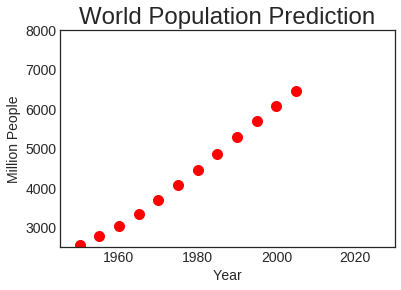

In [3]:
# Visualize data 


plt.style.use('seaborn-white')

fig, ax = plt.subplots()
ax.scatter(X, y, c = "RED", s=100)

# Set chart title and label axes.
ax.set_title("World Population Prediction", fontsize=24)
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Million People", fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=14)

# Set the range for each axis.
ax.axis([1945, 2030, 2500, 8000])

plt.show()

Tất cả những điểm $(x_i,y_i)$ này được thể hiện lên biểu đồ và từ góc độ không chuyên hay chuyên ta đề quan sát thấy chúng có quỹ tích gần như là một đường thẳng. Bắt đầu đi tìm đường thẳng đó nào.

*May mắn là không có outlier trong bộ dữ liệu của chúng ta nhỉ !* `Outlier` là  các phần tử có đặc điểm **nằm xa** với các điểm còn lại trong bộ dữ liệu, kiểu như là một cá biệt vậy cần phải loại bỏ.

#### Step 03. Training model

Ở bước này ta dùng các dữ liệu ở trên để xây dựng hàm ánh xạ xấp xỉ $f$ sao cho hàm mất mát của hàm $f$ so với bộ dữ liệu đạt giá trị nhỏ nhất(đã bàn ở trong phần **`Mô hình toán học của Linear Regression`**).

Nhớ lại công thức nghiệm mà ta tìm lúc nảy: nghiệm của chúng ta cần tìm là một đường thẳng, hay chính là hệ số của đường thẳng $w = [w_0,w_1]$ và nó được tính như sau:
$$ \bar w = A^+b=(\bar X^T X)^+ \bar X^T Y$$

w =  [[-1.40272739e+05]
 [ 7.31398595e+01]]


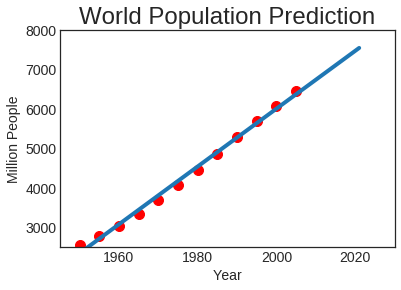

In [4]:
# Building Xbar 
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

# Calculating weights of the fitting line 
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)

# Prepare for fitting line
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(1945, 2021,4)
y0 = w_0 + w_1*x0

fig, ax = plt.subplots()

# Visualize các điểm dữ liệu đầu vào
ax.scatter(X, y, c = "RED", s=100)

# Set chart title and label axes.
ax.set_title("World Population Prediction", fontsize=24)
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Million People", fontsize=14)

# Set the range for each axis.
ax.axis([1945, 2030, 2500, 8000])

# Drawing the fitting line 
ax.plot(x0, y0,linewidth = 4)            # the fitting line

ax.tick_params(axis='both', which='major', labelsize=14)

plt.show()

Từ đồ thị bên trên ta thấy rằng các điểm dữ liệu màu đỏ nằm khá gần đường thẳng dự đoán màu xanh. Vậy mô hình Linear Regression hoạt động tốt với tập dữ liệu training. Bây giờ, chúng ta dùng mô hình này để dự đoán dân số thế giới trong năm 2010, 2015, 2020, 2021 theo yêu cầu của bài toán nhé.

#### Step 04. Testing model

Chúng ta dùng các test data để kiểm tra xem mô hình mà ta xây dựng có oke hay không, nghĩa là output mà nó dự đoán có gần với giá trị thực hay không.

In [5]:
y2010 = w_0 + w_1*2010
y2015 = w_0 + w_1*2015
y2019 = w_0 + w_1*2019
y2020 = w_0 + w_1*2020
y2021 = w_0 + w_1*2021

print("Dân số thế giới vào năm 2010 là:", int(y2010), "triệu người")
print("Dân số thế giới vào năm 2015 là:", int(y2015), "triệu người")
print("Dân số thế giới vào năm 2019 là:", int(y2019), "triệu người")
print("Dân số thế giới vào năm 2020 là:", int(y2020), "triệu người")
print("Dân số thế giới vào năm 2021 là:", int(y2021), "triệu người")

Dân số thế giới vào năm 2010 là: 6738 triệu người
Dân số thế giới vào năm 2015 là: 7104 triệu người
Dân số thế giới vào năm 2019 là: 7396 triệu người
Dân số thế giới vào năm 2020 là: 7469 triệu người
Dân số thế giới vào năm 2021 là: 7542 triệu người


Ta thấy output này chấp nhận được và hiện tại năm 2019 dân só thế giới đang vào khoảng 7,7 tỉ người. Trên thực tế thì đưa ra được một mô hình dự đoán cũng không phải dễ dàng, vì thật sự ta chỉ mới xét đến một yếu tố là năm, bên đó còn hàng ngàn yếu tố khác tác động.

Nhu vậy là ta đã giải quyết bài toán thứ nhất là đưa ra được dự đoán dân số thế giới qua các năm, dựa vào cơ sở toán học mà đã là toán học thì không có gì phải nghi ngờ nữa. Chúng ta sẽ giải bài toán dự đoán cân nặng dựa theo flow vừa rồi.

### *Giải quyết bài toán dự đoán cân nặng*

![Chiều cao-Cân nặng](https://scontent.fsgn5-6.fna.fbcdn.net/v/t1.15752-9/70351549_409554859764076_14264810455695360_n.png?_nc_cat=109&_nc_oc=AQkrJgg1ljbfVNUdAx2WyPlzXZNJXHWdeKLy-i_Wde_6Z_hWcjKnBpOKDArYYuJQB20&_nc_ht=scontent.fsgn5-6.fna&oh=b579faf530f1a2e1c155488aac3b6dcf&oe=5E3DB79C)

#### Step 00.  Chuẩn bị các thư viện cần thiết cho chương trình

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#### Step 01. Prepare training data

In [7]:
name = ["N_Tiến", "N_Kha", "N_Đăng", "H_Vy", "N_Khang", "Đ_Tiến", "P_Quân", "P_Nguyên", "V_Nguyên", "N_Hà", " Đ_Nga", "N_Ngọc", "N_Mạnh", "N_Phú", "N_Vi", "L_Thành", "Đ_Hiền", "L_Phúc", "P_Trí", "Đ_Trường"]
# X là training set: tập giá trị chiều cao của 20 người được thu thập.
X = np.array([[175, 170, 169, 150, 171, 175, 182, 163, 171, 154, 159,157,183,180,165,170,176,169,170,174]]).T
# y là nhãn cho từng điểm dữ liệu, hay chính là cân nặng tương ứng với chiều cao.
y = np.array([[55, 63, 47, 47, 65, 76, 75, 57, 57, 42, 50, 51, 74, 63, 55, 55, 46, 51, 73, 74]]).T

print(X.shape)
print(y.shape)
print(X.min())
print(X.max())
print(y.min())
print(y.max())

(20, 1)
(20, 1)
150
183
42
76


#### Step 02. Trực quan hóa dữ liệu

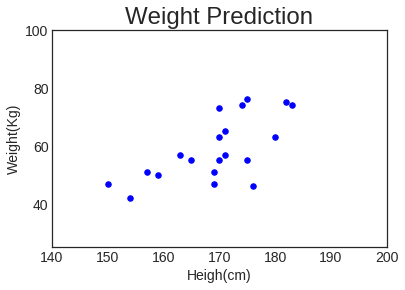

In [8]:
fig, ax = plt.subplots()

# Visualize các điểm dữ liệu đầu vào
ax.scatter(X, y, c = "BLUE", s=30)

# Set chart title and label axes.
ax.set_title("Weight Prediction", fontsize=24)
ax.set_xlabel("Heigh(cm)", fontsize=14)
ax.set_ylabel("Weight(Kg)", fontsize=14)

# Set the range for each axis.
ax.axis([140, 200, 25, 100])

ax.tick_params(axis='both', which='major', labelsize=14)

plt.show()

Nhìn vào dữ liệu được trực visualizaion như vậy, chúng ta có một cảm giác rằng, có gì đó không ổn:**Có biến**. Outlier có trong dữ liệu của chúng ta vì các điểm dữ liệu lần này không còn gần nằm sát một đường thẳng nữa. Tuy là có hình dạng của đường thẳng nhưng các điểm quá rời rạc. Phải xử lý nhiễu ! Bằng cách nào ??

Xử lý nhiễu bằng cách đặt ra một cái **ngưỡng(Threshold)**: điểm dữ liệu nào mà không thỏa mãn cái ngưỡng này thì loại, khỏi cần nghĩ nhiều :). Vậy làm sao chọn ra được cái ngưỡng phù hợp, lỡ quá tay thì sao nhỉ ? Trong bài toán này, theo như quan sát thực tế thì chiều cao của người việt nam bình thường nằm trong khoảng từ 150-180cm và cân nặng nằm trong khoảng từ 42-78Kg, và dĩ nhiên nếu phát triển bình thường thì chiều cao tỉ lệ thuận với cân nặng. Càng cao thì càng nặng, dựa vào lập luận đó, tôi sẽ chọn một ngưỡng chiều cao là 165cm và cân nặng là 60Kg. Và cách dùng ngưỡng để loại outlier rất dễ dàng. Hãy xem hình dưới đây:

![Threshold](https://scontent.fsgn3-1.fna.fbcdn.net/v/t1.15752-9/71846998_761980307569460_1260332391797358592_n.png?_nc_cat=104&_nc_oc=AQmstjANBNn3btDfN2qthkTTpW6E38uzVOMkHJrY0t5J8Q-pDCExBPa8rw1hcFPbIP0&_nc_ht=scontent.fsgn3-1.fna&oh=e47035c615b109fbe08ae1f6c0ea364a&oe=5E36B1C1)

Điểm nào rời vào cùng được gạch chéo sẽ giữa lại, vì nó hợp lí. Các điểm mà rời vào vùng còn lại sẽ bị loại.

In [9]:
for i in range(X.shape[0]-1,-1,-1):
    x = X[i,0]
    z = y[i,0]
    if not((x >= 150 and x<=165 and z >=42 and z<=60) or (x>=165 and x<= 180 and z>= 60 and z<=78)):
        X = np.delete(X,i,0)
        y = np.delete(y,i,0)
        del name[i]
        
print(X.shape)
print(y.shape)
print(len(name))

(12, 1)
(12, 1)
12


Một lần nữa visualize dữ liệu sau khi đã lọc nhiễu (**8/20** nhiễu, một tỉ lệ khủng khiếp khiến ta phải cân nhắc về việc phải điều chỉnh ngưỡng nhưng ở bài toán này cứ làm như vầy nhé.

/home/tien/anaconda3/envs/OpenCV_env/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 7873 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/tien/anaconda3/envs/OpenCV_env/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 7873 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/tien/anaconda3/envs/OpenCV_env/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 7863 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/tien/anaconda3/envs/OpenCV_env/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 7863 missing from current font.
  font.set_text(s, 0, flags=flags)


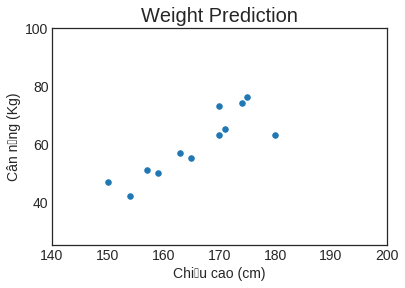

In [10]:
fig, ax = plt.subplots()

plt.style.use('seaborn-white')
ax.scatter(X, y, s = 30)

# Set chart title and label axes.
ax.set_title("Weight Prediction", fontsize=20)
ax.set_xlabel("Chiều cao (cm)", fontsize=14)
ax.set_ylabel("Cân nặng (Kg)", fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=14)

# Set the range for each axis.
ax.axis([140, 200, 25, 100])

plt.show()

Ta có thể thấy dường như rằng các điểm dần tạo ra một quỹ tích giống đường thẳng hơn. Việc chọn đường thẳng có vẽ dễ hơn mặc dầu đã loại bỏ đi 8 datapoint.

#### Step 03. Training model

w =  [[-112.72099644]
 [   1.0405694 ]]


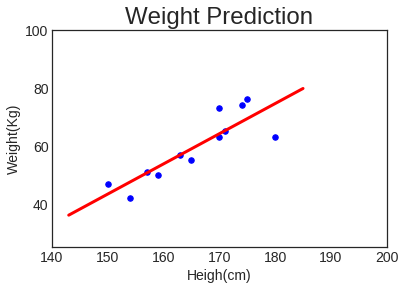

In [11]:
# Building Xbar 
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

# Calculating weights of the fitting line 
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)

# Prepare for fitting line
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(143, 185,10)
y0 = w_0 + w_1*x0

fig, ax = plt.subplots()

# Visualize các điểm dữ liệu đầu vào
ax.scatter(X, y, c = "BLUE", s=30)

# Set chart title and label axes.
ax.set_title("Weight Prediction", fontsize=24)
ax.set_xlabel("Heigh(cm)", fontsize=14)
ax.set_ylabel("Weight(Kg)", fontsize=14)

# Set the range for each axis.
ax.axis([140, 200, 25, 100])

# Drawing the fitting line 
ax.plot(x0, y0,linewidth = 3,c = "RED")            # the fitting line

ax.tick_params(axis='both', which='major', labelsize=14)

plt.show()

#### Step 04. Testing

Sau khi training ta đã thu được một model có khả năng cho ra một giá trị dự đoán cân nặng của một người với chiều cao là $x(cm)$. Sau đây ta sẽ tính chiều cao của các bạn có chiều cao 157cm, 185cm, 150cm.

In [12]:
y157 = w_0 + w_1*157
y185 = w_0 + w_1*185
y150 = w_0 + w_1*150

print("Cân nặng của người có chiều cao 157cm là:", y157, "Kg")
print("Cân nặng của người có chiều cao 185cm là:", y185, "Kg")
print("Cân nặng của người có chiều cao 150cm là:", y150, "Kg")

Cân nặng của người có chiều cao 157cm là: 50.64839857657023 Kg
Cân nặng của người có chiều cao 185cm là: 79.78434163691497 Kg
Cân nặng của người có chiều cao 150cm là: 43.364412811484044 Kg


Vậy là ta đã giải quyết xong 2 bài toán đầu tiên. Có vẽ qua hai bài toán này ta cũng hình dung ra được các bước để build một model machine learning rồi. Nhưng ở đây có một thư viện nên được nhắc đến, đó là **`sklearn`**. Lời giải của nó ngắn gọn và chính xác. Hãy so sánh kết quả của chúng ta với nghiệm từ **thư viện sklearm** nhé:

In [13]:
from sklearn import datasets, linear_model

# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
regr.fit(Xbar, y)

# Compare two results
print( 'Solution found by scikit-learn: ', regr.coef_ )
print( 'Solution found by me: ', w.T)

Solution found by scikit-learn:  [[-112.72099644    1.0405694 ]]
Solution found by me:  [[-112.72099644    1.0405694 ]]


*Đây là những bài toán đơn giản nhất vì chỉ có duy nhất một thông tin input đầu vào(năm, chiều cao) và nhiệm vụ của ta là tìm ra mô hình gần đúng với giá trị thực tế. Tuy nhiên, thực tế thì output đầu ra còn phụ thuộc vào nhiều đại lượng khác, khi đó bài toán ta đối mặt không đơn thuần là một biến mà là nhiều biến. Khi đó làm như nào ??*

 ## 4. Hồi quy tuyến tính nhiều biến.

Phàm làm việc gì cũng phải có định nghĩa. Cho nên phải định nghĩa được như thế nào gọi là hàm nhiều biến và hàm tuyến tính nhiều biến thì nó như thế nào, có hình dạng ra sao ?

### *Định nghĩa hàm tuyến tính nhiều biến và biểu diễn hình học trong không gian*

Một hàm số $f(x_1,x_2,x_3,...,x_n)$ xác định trên $D = D_1\times D_2\times D_3 \times ... \times D_n$ với miền giá trị là $R$($R$ là viết tắt của Range) được gọi là hàm $n$ biến.

- Các ví dụ:
    - a. Hàm hàm biến $P_1: y = f(x) = x - 3$ có đồ thị như hình dưới đây:
    - b. Hàm hai biến $P_2: z = f(x,y) = x + y$ có đồ thị như hình vẽ dưới đây:
    - c. Hàm một biến bậc 3 $P_3: y = f(x) = x^3 + 2x^2 - 3x -1$ có đồ thị như hình vẽ dưới đây:
    - d. Hàm một biến bậc 2 $P_4: y = f(x,y) = 2x^2-y$ có đồ thị như hình vẽ dưới đây:

Chú ý: **tuyến tính có nghĩa là phẳng, là thẳng. Có nghĩa là những thứ có dạng thẳng và phẳng, không có cong quẹo, uốn khúc được gọi là tuyến tính. Vậy phương trình tuyến tính là phương trình có dạng biểu diễn hình trong không gian là một siêu phẳng, một mặt phẳng, một đường thẳng. Nói cách khác, bậc của các biến trong công thức biểu diễn phải là số nguyên không âm và không lớn hơn 1.**

### *Mô hình hóa bài toán dự đoán giá nhà*

**Nhắc lại bài toán**: Chúng ta có dữ liệu được thu thập bởi một công ty bất động sản ABCD với các thuộc tính là: Diện tích của căn nhà, khoảng cách đến trung tâm thành phố(Giả sử là như vậy, trên thực tế còn nhiều thứ affect lắm.) và cuối cùng là giá của căn nhà đó. Hỏi rằng từ bộ dữ liệu được cung cấp bạn có thể xây dựng được một mô hình gì đó để đoán được một căn nhà bất kì có giá bao nhiêu hay không ?

![Price_House](https://scontent.fsgn5-6.fna.fbcdn.net/v/t1.15752-9/71298218_957164514637490_4486566542988804096_n.png?_nc_cat=106&_nc_oc=AQlah8m87U7nA8pEEFRgCMHz7ShQrdCi3kzPRTl1vCJuJQuw_QnpsBzhjh63u4UwcAs&_nc_ht=scontent.fsgn5-6.fna&oh=32a98e35020f8f351149509da5679a1a&oe=5E393366)

Khá giống với bài toán dự đoán dân số thế giới và đoán cân nặng nhỉ ? Điểm khác trong bài toán này là giá nhà phụ thuộc vào 2 yếu tố chứ không phải là một nữa. Đặt $x_1$ là diện tích căn nhà $(m^2)$, $x_2$ là khoảng cách từ căn nhà đến trung tâm thành phố, $y$ là giá của căn hộ. Ta có thể nhận thấy ngay giá trị $y$ càng cao khi và chỉ khi $x_1$ càng cao và $x_2$ càng thấp. Ta nhận thấy mối quan hệ phụ thuộc, vì vậy biểu diễn $y$ dưới dạng hàm số của 2 biến $x_1$ và $x_2$: $$y = f(x_1,x_2)$$ ta chọn quan hệ tuyến tính để giải quyết, hay viết lại hàm này thành: $$y = f(x_1,x_2) = w_0+w_1x_1+w_2x_2 = x^T w$$ với $x = [1, x_1, x_2],  \hspace{0.5cm} w = [w_0, w_1, w_2]$.

Mục tiêu của ta vẫn là đi xấp xỉ hàm $f(x)$ thật tốt sau cho hàm mất mát $L(w)$ đạt giá trị nhỏ nhất: $$L(w) = L(w_0,w_1,w_2) = \frac{1}{2N}\sum_{i=1}^N(y- \bar y)^2$$

tương tự, ta đi tìm nghiệm của của đạo hàm và sao đó giải phương trình $L^{'}(w) = 0$ rồi suy ra nghiệm và cuối cùng nghiệm thu được vẫn là: 

## $$\hspace{3cm} \bar w = argminL(w) =(XX^T)^{-1}Xy$$

### *Giải quyết bài toán*

Các bước để xây dựng mô hình cho bài toán machine learning vẫn như trên, tuy nhiên ở đây phần data training có chút khác đi.

#### Step 00. Import thư viện cần thiết

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
%matplotlib inline

#### Step 01. Chuẩn bị dữ liệu

In [15]:
X = np.array([[200,3],[300,2],[150,12],[500,30],[300,30],[270,10],[1000,12],[75,30],[80,40],[200,20],[300,10],[700,5]]).T
y = np.array([[297,448,200,750,400,400,1300,100,750,280,440,1000]]).T

print(X.shape)
print(y.shape)

(2, 12)
(12, 1)


#### Step 02. Visualize dữ liệu

Làm sao visualize dữ liệu đây nhỉ, nó không còn ở trong không gian hai chiều nữa mà là dữ liệu trong không gian 3 chiều.

/home/tien/anaconda3/envs/OpenCV_env/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 7879 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/tien/anaconda3/envs/OpenCV_env/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 7879 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/tien/anaconda3/envs/OpenCV_env/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 7843 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/tien/anaconda3/envs/OpenCV_env/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 7843 missing from current font.
  font.set_text(s, 0, flags=flags)


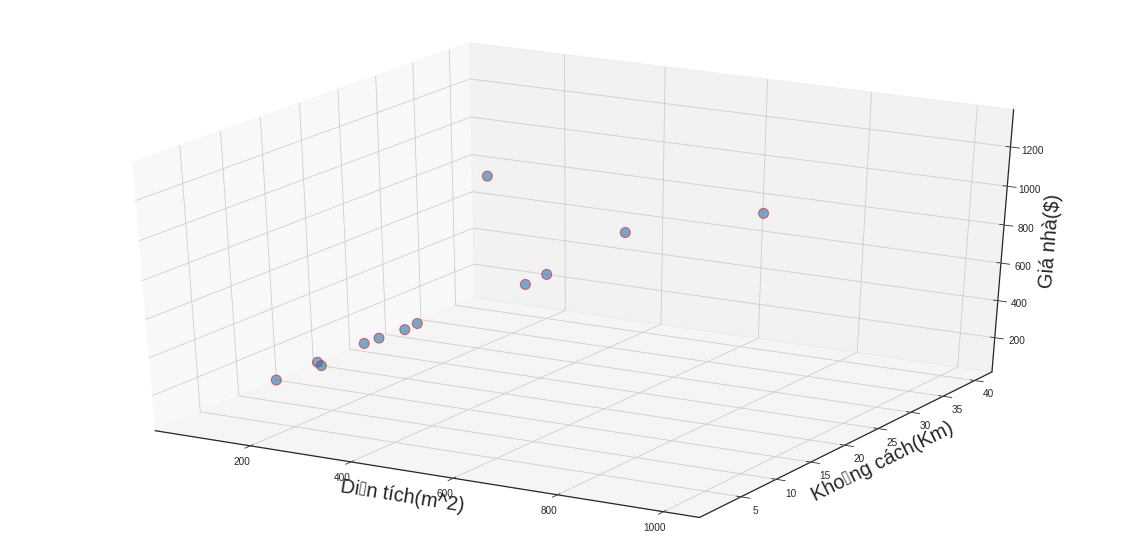

In [16]:
# Visualizing 3-D numeric data with Scatter Plots
# length, breadth and dept
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')


x_1 = [x for x in X[0,]]
x_2 = [x for x in X[1,]]
ax.scatter(x_1, x_2, y, s=100, alpha= 0.6, edgecolors='r')

ax.set_xlabel('Diện tích(m^2)',fontsize = 20)
ax.set_ylabel('Khoảng cách(Km)',fontsize=20)
ax.set_zlabel('Giá nhà($)',fontsize=20)

plt.show()

Nhìn qua thấy các điểm dữ liệu của chúng ta gần như nằm trên cùng một mặt phẳng. Vậy điều dự đoán của chúng là có cơ sở. Hãy đi tìm mặt phẳng đó để chứng minh điều mà ta nghĩ là đúng.

#### Step 03. Training model

#### Step 04. Testing

## 5. Hồi quy đa thức

**Việc giải các bài toán vừa rồi ta quy về việc xét tình liên hệ giữa các giá trị đầu và và các giá trị đầu ra. Sau đó ta áp dụng ngay một hàm tuyến tính để từ đó xây dựng mô hình sau cho tối ưu hàm mất mác.** Tuy nhiên, làm sao ta biết các biểu diễn hàm phụ thuộc một cách khách quan, nói khác hơn là bằng cách nào có thể biết chọn hàm phù hợp. Xét ví dụ cụ thể ở hàm một biến(1 input đầu vào), làm sao biết hàm $f$ là bậc nhất, bậc 2, bậc 3,... Câu trả lời đó sẽ được giải đáp trong phần này !

### *Traight line không fit với dataset !!!*

### *Overfiting*

## 8. Đánh giá một mô hình hồi quy tuyến tính

### *Các bài toán có thể giải bằng linear regression*

Hàm số $y (x)\approx f(x) = x^Tw$ là một hàm tuyến tính theo cả $w$ và $x$. Trên thực tế, **regression có thể áp dụng cho các mô hình chỉ cần tuyến tính theo w**. Ví dụ:
$$y \approx w_1x_1 + w_2x_2 + w_3x_1^2 + w_4sin(x_2)+w_5x_1x_2+w_0$$ là một hàm tuyến tính theo $w$ và vì vậy ta có thể giải được bằng linear regression. Với mỗi vector đặc trưng $x=[x_1,x_2]^T$, chúng ta tính toán vector đặc trưng mới $\tilde x = [x_1,x_2,x_1^2,sin(x_2),x_1x_2]$ rồi áp dụng linear regression với dữ liệu mới này. Tuy nhiên việc tìm ra các hàm số $sin(x_2)$ hay $x_1x_2$ là tương đối không tự nhiên. Hồi quy đa thức(Polynormial Regression) thường được sử dụng nhiều hơn với các vector đặc trưng mới có dạng $[1,x_1,x_1^2,...]^T$.

*Cái gì cũng phải có thước đo và chuẩn mực để cho chúng ta biết khi nào nên sử dụng Linear Regression. Việc xây dựng thuật toán Hồi quy tuyến tính khá là oke và đơn giản(giải ra được bộ nghiệm là thông số của mô hình là coi như xong), bên cạnh đó vẫn rất chi là hạn chế về một số điểm.*

### *Hạn chế của linear regression*

#### *Nhạy cảm với nhiễu(sensitive to noise)*

Các bạn hãy xem lại bài toán dự đoán cân nặng. Nếu không xử lí cái mình gọi là nhiễu(outlier hay còn gọi là noise), thì fitting line sẽ như hình bên dưới. Khi đấy đường thẳng này(chính là mô hình ta đang xây) cũng đang cố gắng `"khớp"` với nhiễu. Cho nên làm kết quả của việc xây dựng(model) không như ý muốn. Và khi testing sẽ thấy được lỗi khá nhiều.

![Sensitive to noise](https://machinelearningcoban.com/assets/LR/output_13_1.png)

Vì vậy, **trước khi thực hiện Linear Regression, các nhiễu (outlier) cần phải được loại bỏ. Bước này được gọi là tiền xử lý (pre-processing)**.

#### *Không biểu diễn được các mô hình phức tạp*

Hạn chế thứ hai của Linear Regression là nó không biễu diễn được các mô hình phức tạp. Mặc dù trong phần trên, chúng ta thấy rằng phương pháp này có thể được áp dụng nếu quan hệ giữa outcome và input không nhất thiết phải là tuyến tính, nhưng mối quan hệ này vẫn đơn giản nhiều so với các mô hình thực tế. Hơn nữa, chúng ta sẽ tự hỏi: làm thế nào để xác định được các hàm như ở trên?!

### *Ridge regression*

Trong trường hợp ma trận $XX^T$ **không khả nghịch(singular)**, có một kỹ thuật nhỏ để tránh hiện tượng này là biến đổi $XX^T$ một chút để biến nó trở thành $XX^T = XX^T + \lambda I$ với $\lambda$ là một số dương rất nhỏ và $I$ là ma trận đơn vị bậc phù hợp.

Ma trận **A là khả nghịch vì** nó là một **ma trận xác định dương**. Thật vật, với mọi $w \neq 0$,
$$w^TAw = w^T(XX^T+\lambda I)w = w^TXX^Tw+\lambda w^Tw=||X^Tw||_2^2+\lambda ||w||_2^2 > 0$$

Lúc này nghiệm của bài toán là $y = (XX^T+\lambda I)^-1Xy$. Nếu xét hàm mất mát:
$$L_2(w)=\frac{1}{2N}(||y-X^Tw||_2^2+\lambda ||w||_2^2)\hspace{10cm}(*)$$

với phương trình đạo hàm theo $w$ bằng không:
$$\frac{\partial L_2(w)}{\partial w} = 0 \Leftrightarrow \frac{1}{N}(X(X^Tw)-y)+\lambda w)=0 \Leftrightarrow (XX^T+\lambda I)w=Xy\hspace{5cm}(**)$$

Ta thấy $w=(XX^T+\lambda I)^-1Xy$ chính là nghiệm của bài toán tối thiểu $L_2(w)$. Mô hình machine learning với hàm mất mát $(*)$ được gọi là **ridge regression**. Ngoài ra việc giúp cho phương trình đạo hàm theo hệ số bằng không có nghiệm duy nhất, ridge còn giúp cho mô hình tranh được overfitting.

### *Phương pháp tối ưu khác: Gradient Descent*

Linear Regression là mô hình đơn giản, lời giải đến từ việc tìm cực trị của hàm số bằng cách giải đạo hàm bằng 0. Trong hầu hết các trường hợp, chúng ta rất khó khăn trong việc giải nghiệm của đạo hàm, hoặc không giải được. Tuy nhiên, nếu hàm mất mát không quá phức tạp thì có thể giải bằng một phương pháp khác, không có gắng giải nghiệm của đạo hàm nữa mà đi xấp xỉ ngiệm, đó là **Gradient Descent**.

Trên thực tế, một vector đặc trưng có thể có kích thước rất lớn, dẫn đến ma trận $XX^T$ có kích thước rất lớn và việc tính ma trận nghịch đảo không có lợi vì quá phức tạp về mặt tính toán. Gradient Descent sẽ giúp chúng ta không cần tính ma trận nghịch đảo(quá êm). Nhưng phương pháp tối ưu này sẽ được bàn sau.

## 8. Tóm tắt

Trong phần này ta đã làm được kha khá chuyện. Linear Regression là thuật toán đơn giản, cho bạn một tập dữ liệu đã được gán nhãn, yêu cầu là bạn hãy đi xây dựng một mô hình có khả năng dự đóan(predict) giá trị của output tương ứng. Đó là quá trình giải quyết các bài toán "tiên tri". Qua các bài toán đó, ta đã biết được quy trình xây dựng một mô hình machine learning là như thế nào, phân tích bài toán để đưa về toán học rồi đem lời giải toán học đối với problem đó vào máy tính bằng cách lập trình. Nhưng chỉ mới bắt đầu thôi, các kĩ thuật tìm điểm tối ưu(optimal point), trực quan hóa dữ liệu(visualizaion), lọc nhiễu, overfitting, phải ghi nhớ cho các bài toán đang chờ bạn ở phía sau.